# Demo CSV --> Graph Notebook

This notebooks demonstrates the data flow of generating a graph from a CSV file. 

In [1]:
import os

import json
import pandas as pd
import regex as re

from summarizer.summarizer import Summarizer
from llm.llm import LLM

## Initialize Test Data

In [2]:
USER_GENERATED_INPUT = {
    'General Description': 'This is data on different countries.',
    'id': 'unique id for a country.',
    'name': 'the country name.',
    'phone_code': 'country area code.',
    'capital': 'the capital of the country.',
    'currency_name': "name of the country's currency",
    'region': 'primary region of the country.',
    'subregion': 'subregion location of the country.',
    'timezones': 'timezones contained within the country borders.',
    'latitude': 'the latitude coordinate of the country center.',
    'longitude': 'the longitude coordinate of the country center.'
}

In [3]:
data = pd.read_csv("data/csv/countries.csv")

## Initialize LLM

In [4]:
llm = LLM()

In [5]:
summarizer = Summarizer(llm=llm, user_input=USER_GENERATED_INPUT, data=data)

In [6]:
discovery = summarizer.run_discovery()
print(discovery)

Based on the preliminary analysis of the data on different countries, here are some important overall details and key features:

1. **Data Overview**:
   - The dataset contains information on 250 countries.
   - There are 10 columns in the dataset with varying levels of completeness.
   - The data types include integers, floats, and objects (strings).

2. **Key Features**:
   - **id**: This column serves as a unique identifier for each country.
   - **name**: The name of the country, with all entries being unique.
   - **phone_code**: The country area code, with some duplicates.
   - **capital**: The capital city of the country, with a few missing values.
   - **currency_name**: Name of the country's currency, with some countries sharing the same currency.
   - **region**: Primary region of the country, with 6 unique regions.
   - **subregion**: Subregion location of the country, with 22 unique subregions.
   - **timezones**: Information about the timezones within the country borders.


In [7]:
initial_model = summarizer.create_initial_model()
print(initial_model)

retry message: 
 
                    Fix the errors in following data model and return a corrected version. Do not return the same data model.
                    Data Model:
                    {'nodes': [{'label': 'Country', 'properties': ['id', 'name', 'phone_code', 'capital', 'currency_name', 'region', 'subregion', 'timezones', 'latitude', 'longitude'], 'unique_constraints': ['id']}, {'label': 'Region', 'properties': ['name'], 'unique_constraints': ['name']}, {'label': 'Subregion', 'properties': ['name'], 'unique_constraints': ['name']}, {'label': 'Timezone', 'properties': ['zoneName', 'gmtOffset'], 'unique_constraints': ['zoneName']}], 'relationships': [{'type': 'BELONGS_TO_REGION', 'properties': [], 'unique_constraints': [], 'source': 'Country', 'target': 'Region'}, {'type': 'BELONGS_TO_SUBREGION', 'properties': [], 'unique_constraints': [], 'source': 'Country', 'target': 'Subregion'}, {'type': 'HAS_TIMEZONE', 'properties': [], 'unique_constraints': [], 'source': 'Country', 'tar

In [8]:
summarizer.current_model

{'nodes': [{'label': 'Country',
   'properties': ['id',
    'name',
    'phone_code',
    'capital',
    'currency_name',
    'region',
    'subregion',
    'timezones',
    'latitude',
    'longitude'],
   'unique_constraints': ['id']},
  {'label': 'Region', 'properties': ['name'], 'unique_constraints': ['name']},
  {'label': 'Subregion',
   'properties': ['name'],
   'unique_constraints': ['name']},
  {'label': 'Timezone', 'properties': ['name'], 'unique_constraints': []}],
 'relationships': [{'type': 'BELONGS_TO_REGION',
   'properties': [],
   'unique_constraints': [],
   'source': 'Country',
   'target': 'Region'},
  {'type': 'BELONGS_TO_SUBREGION',
   'properties': [],
   'unique_constraints': [],
   'source': 'Country',
   'target': 'Subregion'},
  {'type': 'HAS_TIMEZONE',
   'properties': [],
   'unique_constraints': [],
   'source': 'Country',
   'target': 'Timezone'}]}

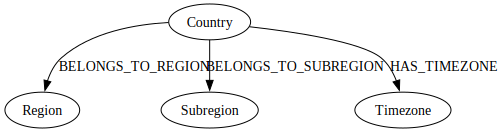

In [9]:
summarizer.model_history[-1].visualize()

In [10]:
print(summarizer.model_history[-1].validate_model(csv_columns=list(USER_GENERATED_INPUT.keys())[1:])['message'])

In [11]:
summarizer.iterate_model(iterations=1)

recieved a valid response


DataModel(nodes=[Node(label='Country', properties=['id', 'name', 'phone_code', 'capital', 'currency_name', 'region', 'subregion', 'timezones', 'latitude', 'longitude'], unique_constraints=['id']), Node(label='Region', properties=['name'], unique_constraints=['name']), Node(label='Subregion', properties=['name'], unique_constraints=['name']), Node(label='Timezone', properties=['name'], unique_constraints=[])], relationships=[Relationship(type='BELONGS_TO_REGION', properties=[], unique_constraints=[], source='Country', target='Region'), Relationship(type='BELONGS_TO_SUBREGION', properties=[], unique_constraints=[], source='Country', target='Subregion'), Relationship(type='HAS_TIMEZONE', properties=[], unique_constraints=[], source='Country', target='Timezone')])

In [12]:
summarizer.current_model

{'nodes': [{'label': 'Country',
   'properties': ['id',
    'name',
    'phone_code',
    'capital',
    'currency_name',
    'region',
    'subregion',
    'timezones',
    'latitude',
    'longitude'],
   'unique_constraints': ['id']},
  {'label': 'Region', 'properties': ['name'], 'unique_constraints': ['name']},
  {'label': 'Subregion',
   'properties': ['name'],
   'unique_constraints': ['name']},
  {'label': 'Timezone', 'properties': ['name'], 'unique_constraints': []}],
 'relationships': [{'type': 'BELONGS_TO_REGION',
   'properties': [],
   'unique_constraints': [],
   'source': 'Country',
   'target': 'Region'},
  {'type': 'BELONGS_TO_SUBREGION',
   'properties': [],
   'unique_constraints': [],
   'source': 'Country',
   'target': 'Subregion'},
  {'type': 'HAS_TIMEZONE',
   'properties': [],
   'unique_constraints': [],
   'source': 'Country',
   'target': 'Timezone'}]}